## Tic-Tac-Toe Agent
​
In this notebook, you will learn to build an RL agent (using Q-learning) that learns to play Numerical Tic-Tac-Toe with odd numbers. The environment is playing randomly with the agent, i.e. its strategy is to put an even number randomly in an empty cell. The following is the layout of the notebook:
        - Defining epsilon-greedy strategy
        - Tracking state-action pairs for convergence
        - Define hyperparameters for the Q-learning algorithm
        - Generating episode and applying Q-update equation
        - Checking convergence in Q-values

#### Importing libraries
Write the code to import Tic-Tac-Toe class from the environment file

In [1]:
from TCGame_Env import TicTacToe # import your class from environment file
import collections
import numpy as np
import random
import pickle
import time
from matplotlib import pyplot as plt

In [2]:
# Function to convert state array into a string to store it as keys in the dictionary
# states in Q-dictionary will be of form: x-4-5-3-8-x-x-x-x
#   x | 4 | 5
#   ----------
#   3 | 8 | x
#   ----------
#   x | x | x

def Q_state(state):

    return ('-'.join(str(e) for e in state)).replace('nan','x')

In [3]:
# Defining a function which will return valid (all possible actions) actions corresponding to a state
# Important to avoid errors during deployment.

def valid_actions(state):    
    valid_Actions = []    
    valid_Actions = [i for i in env.action_space(state)[0]] ###### -------please call your environment as env    
    return valid_Actions

In [4]:
# Defining a function which will add new Q-values to the Q-dictionary. 
def add_to_dict(state):
    state1 = Q_state(state)    
    valid_act = allowed_actions
    if state1 not in Q_dict.keys():
        for action in valid_act:
            Q_dict[state1][action]=0

#### Epsilon-greedy strategy - Write your code here

(you can build your epsilon-decay function similar to the one given at the end of the notebook)

In [5]:
def epsilon_greedy(state, time):    
    max_epsilon = 1.0
    min_epsilon = 0.001
    epsilon = min_epsilon + (max_epsilon - min_epsilon) * np.exp(-0.000001*time)
     
    z = np.random.random()    
    state1 = Q_state(state)
    available_options={}
    if z > epsilon:
        for a in Q_dict[state1]:
            if a in valid_actions(state):
                available_options[a]=Q_dict[state1][a]        
        if(len(available_options)>0):             
            return max(available_options,key=available_options.get)   #Exploitation: this gets the action corresponding to max q-value of current state
    if(len(valid_actions(state))>0):        
        return random.choice(valid_actions(state))    #Exploration: randomly choosing and action        
        
    return None

#### Tracking the state-action pairs for checking convergence - write your code here

In [6]:
# Initialise Q_dictionary as 'Q_dict' and States_tracked as 'States_track' (for convergence)
Q_dict = collections.defaultdict(dict)
States_track = collections.defaultdict(dict)

print(len(Q_dict))
print(len(States_track))

0
0


In [ ]:
#If a Q-dictionary already exists, run the following cell to import the latest dictionary
import os.path

if os.path.exists('Policy.pkl'):
    with open('Policy.pkl', 'rb') as handle:
        Q_dict = pickle.load(handle)
if os.path.exists('States_tracked.pkl'):
    with open('States_tracked.pkl', 'rb') as handle:
        States_track = pickle.load(handle)    
        
print(len(Q_dict))
print(len(States_track))

In [7]:
init_state = [np.nan for _ in range(9)]
env=TicTacToe()
allowed_actions=valid_actions(init_state)
print(allowed_actions)

[(0, 1), (0, 3), (0, 5), (0, 7), (0, 9), (1, 1), (1, 3), (1, 5), (1, 7), (1, 9), (2, 1), (2, 3), (2, 5), (2, 7), (2, 9), (3, 1), (3, 3), (3, 5), (3, 7), (3, 9), (4, 1), (4, 3), (4, 5), (4, 7), (4, 9), (5, 1), (5, 3), (5, 5), (5, 7), (5, 9), (6, 1), (6, 3), (6, 5), (6, 7), (6, 9), (7, 1), (7, 3), (7, 5), (7, 7), (7, 9), (8, 1), (8, 3), (8, 5), (8, 7), (8, 9)]


In [8]:
# Initialise states to be tracked
def initialise_tracking_states():
    sample_q_values = [('x-x-x-x-x-x-x-x-x',(4, 9)),('x-x-x-x-9-x-x-x-x',(0, 2)),('2-x-x-x-9-x-x-x-x',(8,1)),('2-x-x-x-9-x-x-x-1',(1, 6)),
                      ('2-6-x-x-9-x-x-x-1',(2, 7)),('2-6-7-x-9-x-x-x-1',(3, 8)),('2-6-7-8-9-x-x-x-1',(5, 8)),
                      ('9-x-4-x-x-x-x-6-1',(1,2)),('9-2-4-x-x-x-x-6-1',(1,2))]   
    for q_values in sample_q_values:
        state = q_values[0]
        action = q_values[1]
        States_track[state][action] = [] 

In [9]:
#Defining a function to save the Q-dictionary as a pickle file

def save_obj(obj, name ):
    with open(name + '.pkl', 'wb') as f:
        pickle.dump(obj, f, pickle.HIGHEST_PROTOCOL)

In [10]:
def save_tracking_states():
    for state in States_track.keys():
        for action in States_track[state].keys():
            if state in Q_dict and action in Q_dict[state]:
                States_track[state][action].append(Q_dict[state][action])

In [11]:
initialise_tracking_states()

In [12]:
#Defining parameters for the experiment

#EPISODES = 5000
EPISODES = 5000000
STEPS = 4                 #for 9 squares in board 
LR = 0.01                   #learning rate
GAMMA = 0.91


threshold = 1000       #every these many episodes, the 4 Q-values will be stored/appended (convergence graphs)
#threshold = 10
policy_threshold = 30000    #every these many episodes, the Q-dict will be updated
#policy_threshold = 30

### Q-update loop ---write your code here

In [ ]:
start_time = time.time()
for episode in range(EPISODES):    
    env=TicTacToe()
     
    ##### Start writing your code from the next line
    initial_state = env.state
    curr_state = env.state
    
    add_to_dict(curr_state)
    time_step = 0
    
    reward = None    
    curr_action = random.choice(allowed_actions)
    
    next_state = env.step(curr_state, curr_action)[0] 
    
    add_to_dict(next_state)    
    curr_state = next_state 
    
    total_reward = 0
    
    while time_step < STEPS:    #the episode will run only for a few steps and not infinitely
        
        curr_action = epsilon_greedy(curr_state, episode)
        next_step = env.step(curr_state, curr_action)
        
        next_state = next_step[0]
        reward = next_step[1]
        
        add_to_dict(next_state)       
        
        
        next_q_state=Q_state(next_state)
        curr_q_state=Q_state(curr_state)
        
        # UPDATE RULE       
        
        max_next = max(Q_dict[next_q_state],key=Q_dict[next_q_state].get)
        
    
        #this gets the action corresponding to max q-value of next state
        Q_dict[curr_q_state][curr_action] += LR * ((reward + (GAMMA*(Q_dict[next_q_state][max_next]))) - Q_dict[curr_q_state][curr_action] ) 
            
        curr_state = next_state       #state(t) became state(t-1)
        total_reward += reward
        time_step += 1
        if next_step[2]:
            break  #break if the state is terminal     
    
    #TRACKING Q-VALUES
    if (episode == threshold-1):        #at the 999th episode
        initialise_tracking_states()
      
    if ((episode+1) % threshold) == 0:   #every 1000th episode
        save_tracking_states()        
        save_obj(States_track,'States_tracked')   
    
    #SAVING POLICY
    if ((episode+1)% policy_threshold ) == 0:  #every 30000th episodes, the Q-dict will be saved
        save_obj(Q_dict,'Policy')    
    

elapsed_time = time.time() - start_time
save_obj(States_track,'States_tracked')   
save_obj(Q_dict,'Policy')

#### Check the Q-dictionary

In [16]:
Q_dict['x-x-x-x-x-x-x-x-x']

{(0, 1): 0,
 (0, 3): 0,
 (0, 5): 0,
 (0, 7): 0,
 (0, 9): 0,
 (1, 1): 0,
 (1, 3): 0,
 (1, 5): 0,
 (1, 7): 0,
 (1, 9): 0,
 (2, 1): 0,
 (2, 3): 0,
 (2, 5): 0,
 (2, 7): 0,
 (2, 9): 0,
 (3, 1): 0,
 (3, 3): 0,
 (3, 5): 0,
 (3, 7): 0,
 (3, 9): 0,
 (4, 1): 0,
 (4, 3): 0,
 (4, 5): 0,
 (4, 7): 0,
 (4, 9): 0,
 (5, 1): 0,
 (5, 3): 0,
 (5, 5): 0,
 (5, 7): 0,
 (5, 9): 0,
 (6, 1): 0,
 (6, 3): 0,
 (6, 5): 0,
 (6, 7): 0,
 (6, 9): 0,
 (7, 1): 0,
 (7, 3): 0,
 (7, 5): 0,
 (7, 7): 0,
 (7, 9): 0,
 (8, 1): 0,
 (8, 3): 0,
 (8, 5): 0,
 (8, 7): 0,
 (8, 9): 0}

In [17]:
Q_dict['9-2-4-x-x-x-x-6-1']

{}

In [18]:
len(Q_dict)

1584806

In [19]:
# Tested with 5000 Episodes total_reward around 30

#Total rewards after all the episodes
total_reward 

-2

In [20]:
# try checking for one of the states - that which action your agent thinks is the best  -----This will not be evaluated
key=list(States_track['x-x-x-x-x-x-x-x-x'].keys())[0]
print(States_track['x-x-x-x-x-x-x-x-x'][key])

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [36]:
key=list(States_track['2-x-x-x-9-x-x-x-x'].keys())[0]
print(States_track['2-x-x-x-9-x-x-x-x'][key])

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

#### Check the states tracked for Q-values convergence
(non-evaluative)

In [23]:
# Write the code for plotting the graphs for state-action pairs tracked

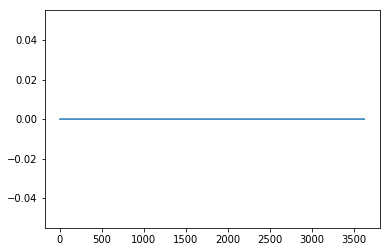

In [24]:
key=list(States_track['x-x-x-x-x-x-x-x-x'].keys())[0]
xaxis= np.asarray(range(0,len(States_track['x-x-x-x-x-x-x-x-x'][key])))
plt.plot(xaxis,np.asarray(States_track['x-x-x-x-x-x-x-x-x'][key]))

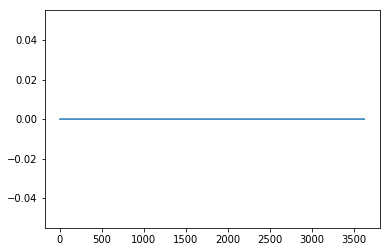

In [37]:
key=list(States_track['2-x-x-x-9-x-x-x-x'].keys())[0]
xaxis= np.asarray(range(0,len(States_track['2-x-x-x-9-x-x-x-x'][key])))
plt.plot(xaxis,np.asarray(States_track['2-x-x-x-9-x-x-x-x'][key]))

### Epsilon - decay check

In [29]:
max_epsilon = 1.0
min_epsilon = 0.001
time2 = np.arange(0,5000000)
epsilon = []
for i in range(0,5000000):
    epsilon.append(min_epsilon + (max_epsilon - min_epsilon) * np.exp(-0.000001*i))

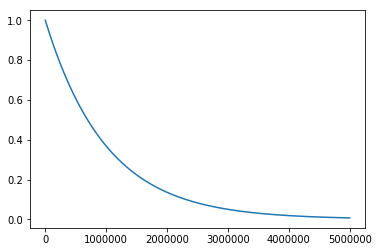

In [30]:
plt.plot(time2, epsilon)
plt.show()